In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from IPython.display import display, HTML

In [2]:
from scipy import stats
from statsmodels.stats import weightstats

In [3]:
df = pd.read_csv("../input/marketing-campaign-fast-food/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv")
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


##### Analysis of the Target feature (SaleInThousands)

In [4]:
pd.DataFrame(df.groupby(["MarketID", "MarketSize"])["SalesInThousands"].mean().sort_values(ascending=False))

,,SalesInThousands
MarketID,MarketSize,
3,Large,84.971705
2,Small,61.761250
4,Small,54.508056
10,Large,53.776250
9,Medium,52.940750
8,Medium,48.952917
5,Medium,48.838000
7,Medium,44.475333
6,Medium,36.397500


##### MarketSize and A Number of Campains in each MarketSize and SaleInThousands

In [5]:
pd.DataFrame(df.groupby(["MarketSize"])["SalesInThousands"].mean().sort_values(ascending=False))

,SalesInThousands
MarketSize,
Large,70.116726
Small,57.409333
Medium,43.985344


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


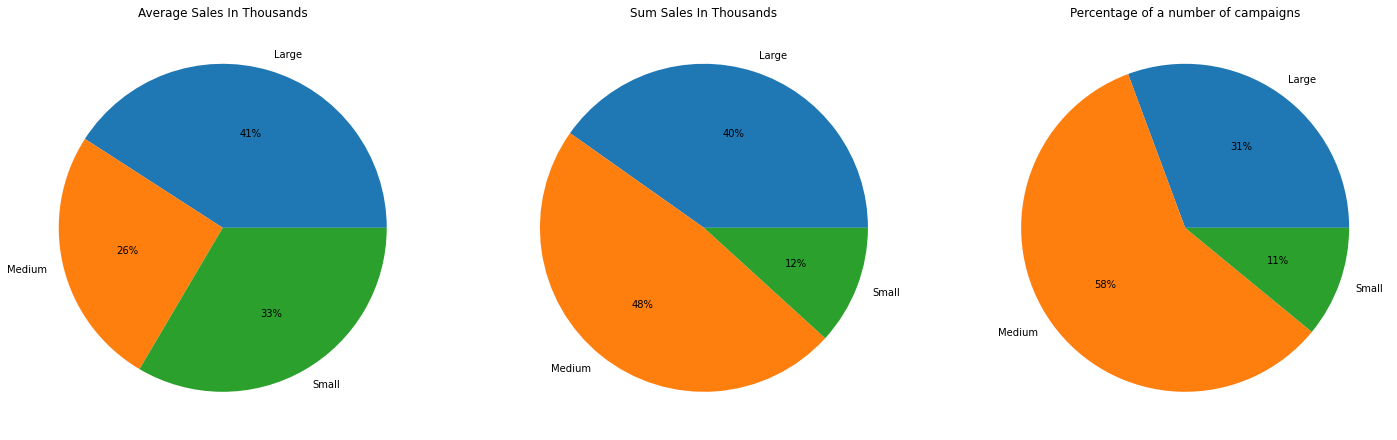

In [8]:
fig = plt.figure(constrained_layout=True, figsize=(20, 6))
grid = gridspec.GridSpec(nrows=1, ncols=3, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])
df.groupby(["MarketSize"])["SalesInThousands"].mean().plot.pie(autopct="%1.0f%%", ax=ax1)
plt.ylabel("")
plt.title("Average Sales In Thousands")

ax1 = fig.add_subplot(grid[0, 1])
df.groupby(["MarketSize"])["SalesInThousands"].sum().plot.pie(autopct="%1.0f%%", ax=ax1)
plt.ylabel("")
plt.title("Sum Sales In Thousands")

ax1 = fig.add_subplot(grid[0, 2])
df.groupby(["MarketSize"])["MarketID"].count().plot.pie(autopct="%1.0f%%", ax=ax1)
plt.ylabel("")
plt.title("Percentage of a number of campaigns")
plt.show()

##### Market size and age of store

In [9]:
df.groupby(["MarketSize"])["AgeOfStore"].agg(["mean", "median"]).sort_values(by=["mean"], ascending=False)

,mean,median
MarketSize,,
Small,10.800000,8.0
Medium,8.787500,7.5
Large,7.142857,6.0


##### Promotion in SalesInThousands

In [10]:
pd.DataFrame(df.groupby(["Promotion"])["SalesInThousands"].mean().sort_values(ascending=False))

,SalesInThousands
Promotion,
1,58.099012
3,55.364468
2,47.329415


Promotion 1 and 3 are quite at the same sales figure level.

In [11]:
pd.DataFrame(df.groupby(["MarketSize", "Promotion"])["SalesInThousands"].mean().sort_values(ascending=False))

SalesInThousands
MarketSize Promotion                  
Large      3                 77.203958
           1                 75.235893
           2                 60.322031
Small      1                 60.162500
           3                 59.514167
           2                 50.810625
Medium     1                 47.672604
           3                 45.468879
           2                 39.114352

Large and Small MarketSize display a significant sales.

##### Marketsize for each promotion

In [12]:
pd.DataFrame(df.groupby(["MarketSize", "Promotion"])["MarketID"].count())

MarketID
MarketSize Promotion          
Large      1                56
           2                64
           3                48
Medium     1                96
           2               108
           3               116
Small      1                20
           2                16
           3                24

Most Sale come from medium and large market which receive a large number of marketing campaign as well.

In [13]:
df.groupby(["MarketSize", "Promotion"]).count()["MarketID"].unstack("MarketSize")

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


<AxesSubplot:xlabel='Promotion', ylabel='count'>

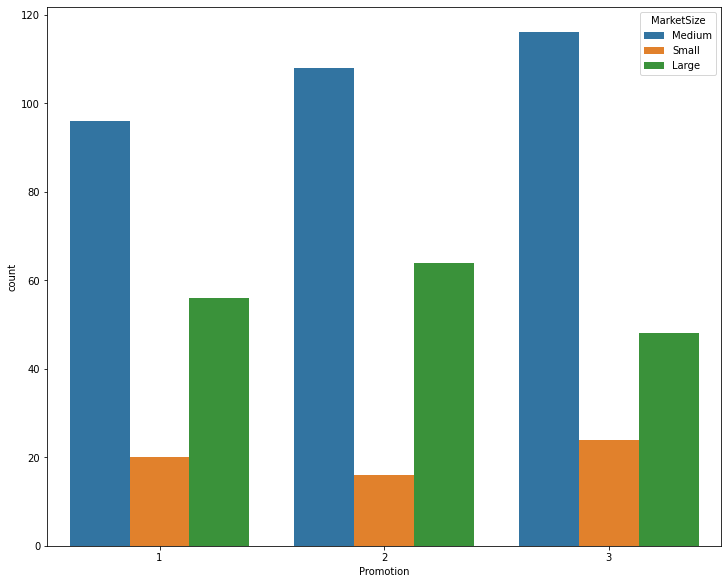

In [14]:
plt.figure(constrained_layout=True, figsize=(10, 8))
sns.countplot(x=df["Promotion"], hue=df["MarketSize"])

<AxesSubplot:xlabel='Promotion'>

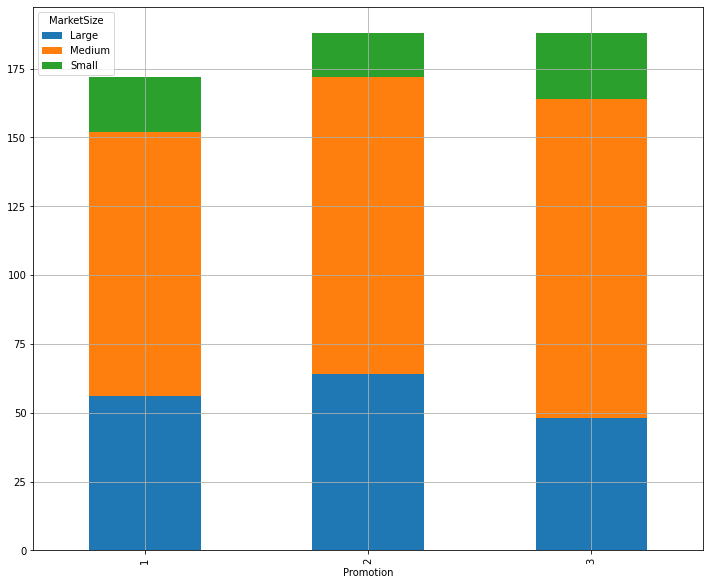

In [16]:
df.groupby(["MarketSize", "Promotion"]).count()["MarketID"].unstack("MarketSize").plot(
    kind="bar",
    figsize=(12, 10),
    grid=True,
    stacked=True
)

##### AgeOfStore

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AgeOfStore', ylabel='Density'>

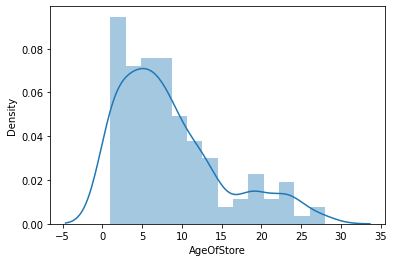

In [17]:
sns.distplot(df["AgeOfStore"])

The majority of store age is young.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AgeOfStore', ylabel='count'>

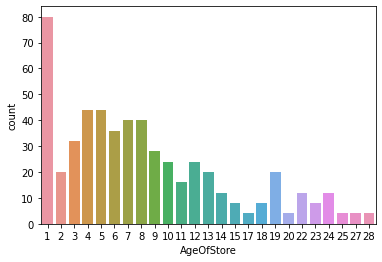

In [18]:
sns.countplot(df["AgeOfStore"])

##### Week
4 weeks of running campaign

In [21]:
pd.DataFrame(df.groupby(["week"])["SalesInThousands"].mean().sort_values(ascending=False))

,SalesInThousands
week,
1,53.790584
3,53.474599
2,53.386569
4,53.213066


Sale in all weeks are the almost same.

In [22]:
pd.DataFrame(df.groupby(["Promotion", "week"])["SalesInThousands"].mean().sort_values(ascending=False))

SalesInThousands
Promotion week                  
1         3            58.774884
          4            58.447209
          1            58.244419
          2            56.929535
3         2            55.949149
          1            55.776170
          4            55.354681
          3            54.377872
2         1            47.730213
          3            47.722128
          2            47.582553
          4            46.282766

In [24]:
pd.DataFrame(df.groupby(["MarketSize", "week"])["SalesInThousands"].mean().sort_values(ascending=False))

SalesInThousands
MarketSize week                  
Large      1            70.793333
           3            70.647381
           4            70.369524
           2            68.656667
Small      4            59.368000
           2            58.675333
           1            56.245333
           3            55.348667
Medium     1            44.403875
           2            44.378125
           3            44.107500
           4            43.051875

# A/B Testing

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0, 'SalesInThousand')

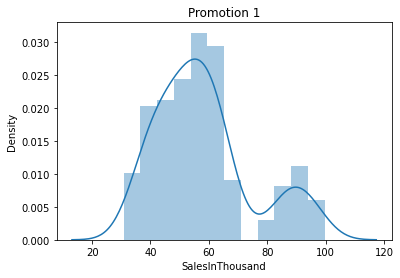

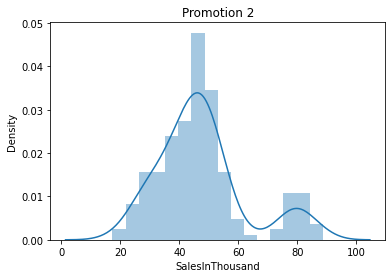

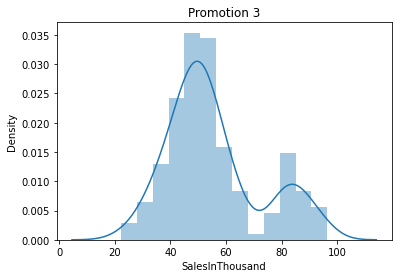

In [33]:
fig = plt.figure()
sns.distplot(df.loc[df['Promotion']==1, "SalesInThousands"])
plt.title("Promotion 1")
plt.xlabel("SalesInThousand")

fig = plt.figure()
sns.distplot(df.loc[df['Promotion']==2, "SalesInThousands"])
plt.title("Promotion 2")
plt.xlabel("SalesInThousand")

fig = plt.figure()
sns.distplot(df.loc[df['Promotion']==3, "SalesInThousands"])
plt.title("Promotion 3")
plt.xlabel("SalesInThousand")

## F-Test

In [35]:
Promotion_number = df["Promotion"].unique()

d_data = {promotion:df[df["Promotion"]==promotion]["SalesInThousands"] for promotion in Promotion_number}

F, p = stats.f_oneway(d_data[1], d_data[2], d_data[3])

print("p-value: {}, thus rejecting the null hypothesis".format(p))

p-value: 6.765849261408714e-10, thus rejecting the null hypothesis


# Z-Test

In [39]:
t, p = stats.ttest_ind(df.loc[df["Promotion"]==1, "SalesInThousands"],
                      df.loc[df["Promotion"]==2, "SalesInThousands"],
                      equal_var = False)
print("p-value = {:.4f}, thus Promotion 1 and 2 are statistically similar".format(p))

t, p = stats.ttest_ind(df.loc[df["Promotion"]==1, "SalesInThousands"],
                      df.loc[df["Promotion"]==3, "SalesInThousands"],
                      equal_var = False)
print("p-value = {:.4f}, thus Promotion 1 and 3 are statistically similar".format(p))

t, p = stats.ttest_ind(df.loc[df["Promotion"]==2, "SalesInThousands"],
                      df.loc[df["Promotion"]==3, "SalesInThousands"],
                      equal_var = False)
print("p-value = {:.4f}, thus Promotion 2 and 3 are statistically similar".format(p))

p-value = 0.0000, thus Promotion 1 and 2 are statistically similar
p-value = 0.1206, thus Promotion 1 and 3 are statistically similar
p-value = 0.0000, thus Promotion 2 and 3 are statistically similar


promotion 1 and 3 is greater than 0.05, indicating a strong evidence of null hypothesis

# Modeling

To comfirm those statements above are right, we put all features in linear model to see which features are crucial that Sale is affected by those.


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
df["MarketID"] = df["MarketID"].astype(int)
df["Promotion"] = df["Promotion"].astype(str)
all_data = pd.get_dummies(df.drop("LocationID", axis=1), drop_first=True)

In [43]:
x = all_data.drop("SalesInThousands", axis=1)
y = all_data["SalesInThousands"]

Text(0.5, 1.0, 'Important Feature Using Linear Model')

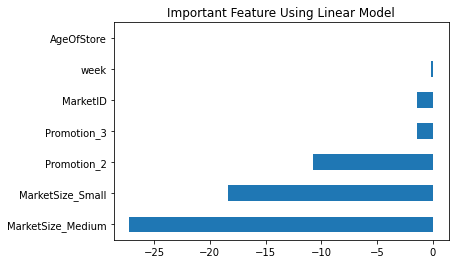

In [45]:
model = LinearRegression()
model.fit(x,y)

coef = pd.Series(model.coef_, index = x.columns)

imp_coef = coef.sort_values()
imp_coef.plot(kind="barh")
plt.title("Important Feature Using Linear Model")

# Conclusion

1. Conducting A/B Test on Promotion to find out if all promotions are alike.

2. Modeling the whole dataset in linear regression model as a way to comfirm all statements above is right.